In [50]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

import matplotlib
from pcygni_5 import PcygniCalculator
import astropy.units as units
import astropy.constants as csts
from scipy.interpolate import interp1d
import lmfit
import time
import pickle
import corner

#My plot style to standardize my plot esthetics
def reset_plt(ticksize,fontsize):
    plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    #plt.rcParams['pcolor.shading'] = 'nearest'
    

def put_ticks(this_fig,this_ax):
    this_ax.xaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, right = True)
    this_ax.xaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, right = True)
    dx = -3/72
    dy = -3/72
    y_offset = matplotlib.transforms.ScaledTranslation(0, dy, this_fig.dpi_scale_trans)
    x_offset = matplotlib.transforms.ScaledTranslation(dx, 0, this_fig.dpi_scale_trans)

    for label in this_ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + y_offset)

    for label in this_ax.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + x_offset)
        
        
import math
pi = np.pi; h = 6.626e-34; c = 3.0e+8; k = 1.38e-23

from scipy.integrate import quad
def integral(x): 
    return np.sqrt(1-v**2) * 1/(1-v*np.cos(x))*np.sin(x)*np.cos(x)**2 * (3) 

#n_days = np.array([126000, 212400, 298800, 385200])/86400
#n_days = np.array([1.43, 2.42, 3.41, 4.4])
#n_days = np.array([1.43, 2.42, 3.45, 4.4, 5.4])

#beta, doppler = np.loadtxt('doppler_wo_prolate.txt')
#inter = interp1d(beta, doppler)

beta, doppler = np.loadtxt('./Doppler Suggested/doppler_wo_prolate_inv.txt')
inter = interp1d(beta, doppler)

def lum_dist_arr(N, vphot, n_days=1.43, dt=0.): #propagate bb to luminosity distance 
    delta = inter(vphot) #1-2/3*11/10*vphot
    corr = delta**4
        
    theta = 2*np.sqrt( N*10**(7) / corr )#**5)/np.pi ) #inverse
    v = vphot*c 
    t = (n_days-dt) * (3600*24)
    r = v*t
    
    D = r/theta*2# factor of 2 
    D_mpc = D*(3.2408e-23) 
    return D_mpc


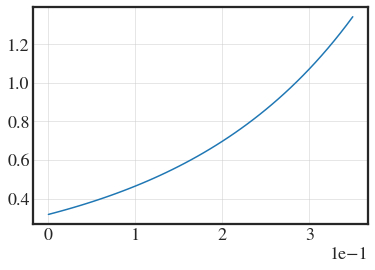

In [55]:
plt.plot(beta, inter(beta)**4/inter2(beta))

In [51]:
#beta, doppler = np.loadtxt('./codes - Diluted BB/Derivation_conv_Sadun_2.txt')
#beta, doppler = np.loadtxt('./codes - Diluted BB/Derivation_conv_Udi_full.txt')
beta, doppler2 = np.loadtxt('./codes - Diluted BB/Derivation_conv_Stuart.txt')
#beta, doppler = np.loadtxt('./codes - Diluted BB/Derivation_conv_Stuart.txt')

inter2 = interp1d(beta, doppler2)

def lum_dist_arr(N, vphot, n_days=1.43, dt=0.): #propagate bb to luminosity distance 
    delta = inter2(vphot) #v_perp, 1-2/3*11/10*vphot
    corr = delta#/inter2(vphot)**2#**4
        
    theta = 2*np.sqrt( N*10**(7) / corr ) #inverse
    v = vphot*c 
    t = (n_days-dt) * (3600*24)
    r = v*t
    
    D = r/theta*2# factor of 2 
    D_mpc = D*(3.2408e-23) 
    return D_mpc

Lum_dist =  46.91167023504226 + 0.26632174320864266 - 0.27401840771437236
<Parameter 've', value=0.9583911740168418 +/- 0.0484, bounds=[0:1]>
3.128645232845264e-29
Lum_dist =  45.92404908143361 + 0.23115817954193574 - 0.23731044550388702
<Parameter 've', value=7.104226961196531 +/- 3.54, bounds=[0:10]>
3.2010461509524127e-29
Lum_dist =  49.89446452592891 + 0.7400030445851442 - 0.874644049568964
<Parameter 've', value=9.335659832221767 +/- 1.1, bounds=[0:10]>
3.149174534906718e-29


(42.0, 53.0)

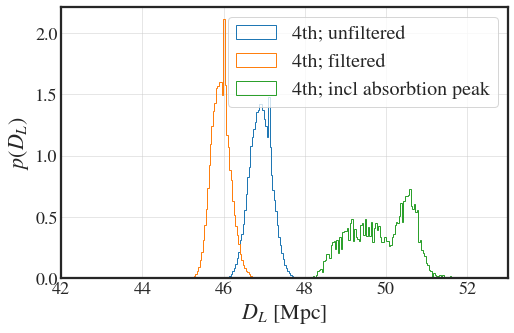

In [47]:
n_days = [4.40, 4.40, 4.4]

files = ["./Data/OB4/OB4_3_peaks_XL.pkl",
        "./Data/OB4/OB4_3_peaks_filtered.pkl", 
        "./data/OB4/OB4_3_peaks_filtered_3rdpeak_3.pkl",
        
         ] 

label_i = ['4th; unfiltered', 
           '4th; filtered', 
           '4th; incl absorbtion peak']


#files = ["./data/OB1/OB1_3_peaks_free_ve.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
#        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl"] 

reset_plt(18,22)
plt.figure(figsize=(8,5))
    
steady = [22*100, 25*100, 22*1000, 22*100, 22*100]

d_m, ds_1, ds_2 = [], [], []
multi = np.ones(5) 
#[1.016, 1.012, 1.008, 1, 1, 1]
#multi = [np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi)]

pdf_list = []
for idx, file in enumerate(files):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    #print(emcee_res.params['T'])
    #print(emcee_res.params['vphot'])
    
    vphot = np.array(emcee_flatten['vphot'])
        
    dl = lum_dist_arr(np.array(emcee_flatten['N']), vphot, n_days=n_days[idx])[steady[idx]:]*multi[idx]
                      #emcee_res.params['t0'].value/86400)#n_days[idx])
    
    h = plt.hist(dl, bins=300, histtype='step', density=True, label=label_i[idx], range=(42,53))
    #h = plt.hist(dl, bins=300, histtype='stepfilled', density=True, alpha=0.2, range=(37,47))
    pdf_list.append(h[0])
    #plt.hist(dl, bins=100, histtype='stepfilled', density=True, alpha=0.2)
    #, range=(35,50));
    d1, d_l, d_h = np.median(dl), np.percentile(dl,15.9), np.percentile(dl,100-15.9)
    d_m.append(d1); ds_1.append(d1-d_l), ds_2.append(d_h-d1)
    print('Lum_dist = ', d1, '+', d_h-d1, '-', d1-d_l)
    print(emcee_res.params['ve'])
    print(np.median(emcee_flatten['N']))

d_m = np.array(d_m); ds_1 = np.array(ds_1); ds_2 = np.array(ds_2)
    
plt.legend(frameon=True, fontsize=20)
plt.xlabel(r'$D_L$ [Mpc]'), plt.ylabel(r'$p(D_L)$') 
#plt.xlim(35, 47)
plt.xlim(42, 53)

#plt.savefig('Pictures/dl_dist_4.png', dpi=300)

Lum_dist =  39.02575359068992 + 0.09249105601710994 - 0.08822969158181593
<Parameter 've', value=1.4884858338984008 +/- 3.15, bounds=[0:10]>
3.9169248650013465e-29
Lum_dist =  40.117287838687425 + 0.07310699661063325 - 0.07114625533868235
<Parameter 've', value=6.626496794247202 +/- 2.32, bounds=[0:10]>
3.817335296521477e-29
Lum_dist =  39.11495700514811 + 0.18689902244329204 - 0.27306541678274954
<Parameter 've', value=3.401522845443509 +/- 1.33, bounds=[0:10]>
4.104082978795802e-29
Lum_dist =  39.394982742132584 + 0.08759343249428042 - 0.10160247526015098
<Parameter 've', value=46.3682739518585 +/- 34.2, bounds=[0:100]>
3.897086526125714e-29


(38.0, 44.0)

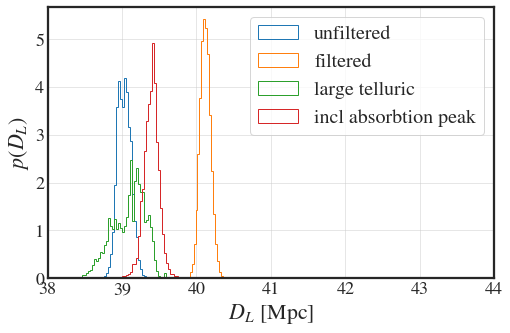

In [48]:
n_days = [3.41, 3.41, 3.41, 3.41]

files = ["./Data/OB3/OB3_3_peaks_XL.pkl",
        "./Data/OB3/OB3_3_peaks_filtered_3.pkl", 
        "./Data/OB3/OB3_3_peaks_filtered_12500.pkl",
        "./data/OB3/OB3_3_peaks_filtered_3rdpeak.pkl",
         ] 
label_i = ['unfiltered', 'filtered', 'large telluric', 'incl absorbtion peak']
#files = ["./data/OB1/OB1_3_peaks_free_ve.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
#        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl"] 

reset_plt(18,22)
plt.figure(figsize=(8,5))
    
steady = [22*100, 25*100, 22*1000, 22*100, 22*100]

d_m, ds_1, ds_2 = [], [], []
multi = np.ones(5) 
#[1.016, 1.012, 1.008, 1, 1, 1]
#multi = [np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi)]

pdf_list = []
for idx, file in enumerate(files):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    #print(emcee_res.params['T'])
    #print(emcee_res.params['vphot'])
    
    vphot = np.array(emcee_flatten['vphot'])
        
    dl = lum_dist_arr(np.array(emcee_flatten['N']), vphot, n_days=n_days[idx])[steady[idx]:]*multi[idx]
                      #emcee_res.params['t0'].value/86400)#n_days[idx])
    
    h = plt.hist(dl, bins=300, histtype='step', density=True, label=label_i[idx], range=(37,45))
    #h = plt.hist(dl, bins=300, histtype='stepfilled', density=True, alpha=0.2, range=(37,47))
    pdf_list.append(h[0])
    #plt.hist(dl, bins=100, histtype='stepfilled', density=True, alpha=0.2)
    #, range=(35,50));
    d1, d_l, d_h = np.median(dl), np.percentile(dl,15.9), np.percentile(dl,100-15.9)
    d_m.append(d1); ds_1.append(d1-d_l), ds_2.append(d_h-d1)
    print('Lum_dist = ', d1, '+', d_h-d1, '-', d1-d_l)
    print(emcee_res.params['ve'])
    print(np.median(emcee_flatten['N']))

d_m = np.array(d_m); ds_1 = np.array(ds_1); ds_2 = np.array(ds_2)
    
plt.legend(frameon=True, fontsize=20)
plt.xlabel(r'$D_L$ [Mpc]'), plt.ylabel(r'$p(D_L)$') 
#plt.xlim(35, 47)
plt.xlim(38, 44)

#plt.savefig('Pictures/dl_dist_4.png', dpi=300)

In [ ]:
"./Data/OB4/OB4_two_Pcygni_28x5000_lambda0_7550.pkl" , "./Data/OB5/OB5_two_Pcygni_28x5000_lambda0_7550.pkl"

Lum_dist =  40.1189397587591 + 0.3512988625337172 - 0.344384546080434
<Parameter 've', value=6.626496794247202 +/- 2.32, bounds=[0:10]>
3.817335296521477e-29
Lum_dist =  35.77574295837228 + 0.712598123597715 - 1.710486558353935
<Parameter 've', value=9.962164812949643 +/- 0.0786, bounds=[0:10]>
4.818268473376406e-29
Lum_dist =  40.83684113141787 + 0.3888790065084251 - 0.378082229062251
<Parameter 've', value=4.652191623312379 +/- 1.22, bounds=[0:20]>
3.717732756728414e-29
<Parameter 'vphot', value=0.20525149518397817 +/- 0.00233, bounds=[0:1]>
<Parameter 'v_phot_n', value=0.26364423654451374 +/- 0.0305, bounds=[0:1]>


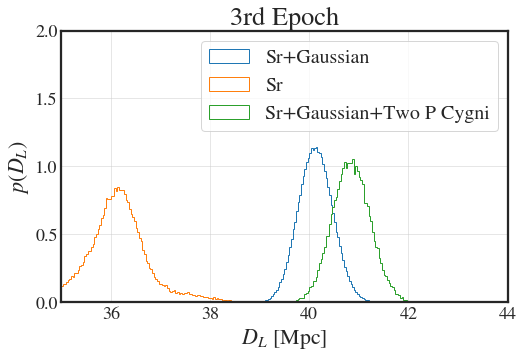

In [20]:
n_days = [3.41, 3.41, 3.41, 3.41]

files = ["./data/OB3/OB3_3_peaks_filtered_3.pkl",
        "./data/OB3/OB3_3_peaks_no_gaussian.pkl", 
        "./Data/OB3/OB3_two_Pcygni_28x2000_lambda0_7500.pkl"
         ] 
label_i = ['Sr+Gaussian', 'Sr', 'Sr+Gaussian+Two P Cygni']
#files = ["./data/OB1/OB1_3_peaks_free_ve.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
#        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl"] 

reset_plt(18,22)
plt.figure(figsize=(8,5))
    
steady = [22*100, 25*100, 22*1000, 22*100, 22*100]

d_m, ds_1, ds_2 = [], [], []
multi = np.ones(5) 
#[1.016, 1.012, 1.008, 1, 1, 1]
#multi = [np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi)]

pdf_list = []
for idx, file in enumerate(files):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    #print(emcee_res.params['T'])
    #print(emcee_res.params['vphot'])
    
    vphot = np.array(emcee_flatten['vphot'])
        
    dl = lum_dist_arr(np.array(emcee_flatten['N'])*np.random.normal(loc=1, scale=0.017, size=len(emcee_flatten['N'])), vphot, n_days=n_days[idx])[steady[idx]:]*multi[idx]
                      #emcee_res.params['t0'].value/86400)#n_days[idx])
    
    h = plt.hist(dl, bins=300, histtype='step', density=True, label=label_i[idx], range=(35,45))
    #h = plt.hist(dl, bins=300, histtype='stepfilled', density=True, alpha=0.2, range=(37,47))
    pdf_list.append(h[0])
    #plt.hist(dl, bins=100, histtype='stepfilled', density=True, alpha=0.2)
    #, range=(35,50));
    d1, d_l, d_h = np.median(dl), np.percentile(dl,15.9), np.percentile(dl,100-15.9)
    d_m.append(d1); ds_1.append(d1-d_l), ds_2.append(d_h-d1)
    print('Lum_dist = ', d1, '+', d_h-d1, '-', d1-d_l)
    print(emcee_res.params['ve'])
    print(np.median(emcee_flatten['N']))

d_m = np.array(d_m); ds_1 = np.array(ds_1); ds_2 = np.array(ds_2)
    
plt.legend(frameon=True, fontsize=20)
plt.xlabel(r'$D_L$ [Mpc]'), plt.ylabel(r'$p(D_L)$') 
#plt.xlim(35, 47)
plt.xlim(35, 44)
plt.ylim(0, 2.)
plt.title('3rd Epoch')
#plt.savefig('Pictures/dl_dist_4.png', dpi=300)

print(emcee_res.params['vphot'])
print(emcee_res.params['v_phot_n'])

In [21]:
pickle_in = open("./Data/OB3/OB3_two_Pcygni_28x2000_lambda0_7500.pkl","rb")
emcee_res = pickle.load(pickle_in)
emcee_flatten = emcee_res.flatchain
emcee_res.params

name,value,standard error,relative error,initial value,min,max,vary
T,3408.53281,2.40298065,(0.07%),3415.4028853683353,2500.00000,7500.00000,True
N,3.7177e-29,9.9336e-32,(0.27%),3.705093416020356e-29,-inf,inf,True
vphot,0.20525150,0.00232741,(1.13%),0.21119858450110202,0.00000000,1.00000000,True
vmax,0.23819309,0.00125663,(0.53%),0.24181506946147507,0.00000000,1.00000000,True
t0,298800.000,,(0.53%),298800,-inf,inf,False
tau,1.42964450,0.06237798,(4.36%),1.5899390307967098,0.00000000,10.0000000,True
vref,0.00000000,,(4.36%),0.0,0.00000000,1.00000000,False
ve,4.65219162,1.22378904,(26.31%),6.618369888440105,0.00000000,20.0000000,True
occult,3.76508535,0.08127279,(2.16%),3.6462402124016253,0.10000000,20.0000000,True
amp1,0.98392952,0.00749772,(0.76%),0.9682200714954927,0.01000000,5.00000000,True


Lum_dist =  44.25065198564951 + 0.24412636975968383 - 0.22069219597652534
<Parameter 've', value=9.899728597677559 +/- 0.119, bounds=[0:10]>
4.8779290110123244e-29
Lum_dist =  45.92404908143361 + 0.23115817954193574 - 0.23731044550388702
<Parameter 've', value=7.104226961196531 +/- 3.54, bounds=[0:10]>
3.2010461509524127e-29
Lum_dist =  51.70287462752154 + 0.2982461539892043 - 0.36604428992969673
<Parameter 've', value=12.032170426234178 +/- 4.82, bounds=[0:20]>
3.1204865728902563e-29


(42.0, 53.0)

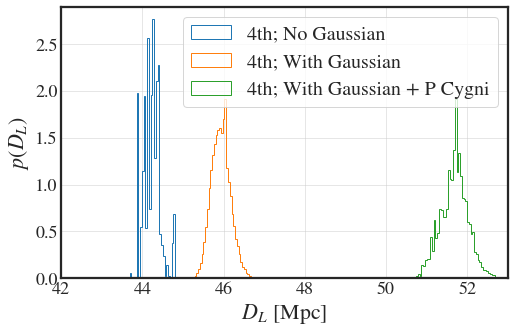

In [7]:
n_days = [4.40, 4.40, 4.4]

files = ["./Data/OB4/OB4_3_peaks_no_gaussian.pkl",
        "./Data/OB4/OB4_3_peaks_filtered.pkl", 
        "./data/OB4/OB4_two_Pcygni_28x2500_lambda0_7600.pkl",
        
         ] 

label_i = ['4th; No Gaussian', 
           '4th; With Gaussian', 
           '4th; With Gaussian + P Cygni']


#files = ["./data/OB1/OB1_3_peaks_free_ve.pkl", "./data/OB2/OB2_3_peaks_XL.pkl", 
#        "./data/OB3/OB3_3_peaks_XL.pkl", "./Data/OB4/OB4_3_peaks_XL.pkl"] 

reset_plt(18,22)
plt.figure(figsize=(8,5))
    
steady = [22*100, 25*100, 22*1000, 22*100, 22*100]

d_m, ds_1, ds_2 = [], [], []
multi = np.ones(5) 
#[1.016, 1.012, 1.008, 1, 1, 1]
#multi = [np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi), np.sqrt(np.pi)]

pdf_list = []
for idx, file in enumerate(files):
    pickle_in = open(file,"rb")
    emcee_res = pickle.load(pickle_in)
    emcee_flatten = emcee_res.flatchain
    
    #print(emcee_res.params['T'])
    #print(emcee_res.params['vphot'])
    
    vphot = np.array(emcee_flatten['vphot'])
        
    dl = lum_dist_arr(np.array(emcee_flatten['N']), vphot, n_days=n_days[idx])[steady[idx]:]*multi[idx]
                      #emcee_res.params['t0'].value/86400)#n_days[idx])
    
    h = plt.hist(dl, bins=300, histtype='step', density=True, label=label_i[idx], range=(40,53))
    #h = plt.hist(dl, bins=300, histtype='stepfilled', density=True, alpha=0.2, range=(37,47))
    pdf_list.append(h[0])
    #plt.hist(dl, bins=100, histtype='stepfilled', density=True, alpha=0.2)
    #, range=(35,50));
    d1, d_l, d_h = np.median(dl), np.percentile(dl,15.9), np.percentile(dl,100-15.9)
    d_m.append(d1); ds_1.append(d1-d_l), ds_2.append(d_h-d1)
    print('Lum_dist = ', d1, '+', d_h-d1, '-', d1-d_l)
    print(emcee_res.params['ve'])
    print(np.median(emcee_flatten['N']))

d_m = np.array(d_m); ds_1 = np.array(ds_1); ds_2 = np.array(ds_2)
    
plt.legend(frameon=True, fontsize=20)
plt.xlabel(r'$D_L$ [Mpc]'), plt.ylabel(r'$p(D_L)$') 
#plt.xlim(35, 47)
plt.xlim(42, 53)

#plt.savefig('Pictures/dl_dist_4.png', dpi=300)